# Tutorial for QSVM

The description and mathematics of QSVM is availbale on the below mentioned resources:<br>
- https://www.sigmoid.com/blogs/quantum-computing-blog-3-how-to-implement-qsvm-in-the-ibm-q-environment/
- https://qiskit.org/documentation/stable/0.24/tutorials/machine_learning/01_qsvm_classification.html


We will deal with the code based understanding of QSVM in this Notebook

## Pre-requisite
- Install any python IDE (I have used Jupyter Notebook on anaconda Navigator)
- Install qiskit (pip install qiskit)
- Install qiskit.aqua (pip install qiskit.aqua)

***

## Adding Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
#from qiskit.utils import QuantumInstance
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM, VQC
import qiskit

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging


### 1. Working with Ad-hoc data set

>We are using ad_hoc_data set available in python. Setting feature dimension to 2, with training data size of 20 and test data size of 10.
Then taking some extra data for testing from sample_ad_hoc_data, sample size of 10
Ploting the total sample on graph also
Dividing our extra_test_data into datapoints and class_to_label, which will be used later

In [19]:
feature_dim=2 

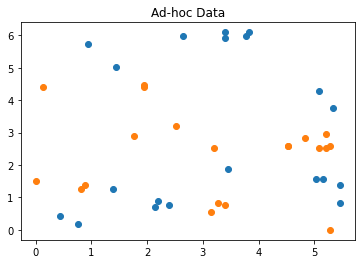

Class labels of datapoints {'A': 0, 'B': 1}


In [89]:
sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20, 
    test_size=10, 
    n=feature_dim, 
    gap=0.3, 
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_Total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print('Class labels of datapoints',class_to_label)

>Plotting datapoints to have visualization

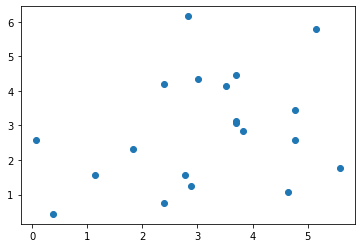

In [90]:
x=[]
y=[]
for i in datapoints[0]:
        x.append(i[0])
        y.append(i[1])

plt.scatter(x,y)

>Setting the feature map and then creating the qsvm, which we have passed datapoints[0] (datapoints[0] contains the datapoints and datapoint[1] contains the labels for those points) in the parameter. When we run the QSVM, it will provide predictions for those datapoints

In [91]:
seed = 1024

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map,training_input, test_input, datapoints[0])


backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)


>Now running the QSVM with quantum_instance which we have created above

In [92]:
result_ad_hoc = qsvm.run(quantum_instance)

In [93]:
print('Predicted labels: ',result_ad_hoc['predicted_labels'])
print('actual labels   : ',datapoints[1])
print('Success Ratio',result_ad_hoc['test_success_ratio'])

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
actual labels   :  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Success Ratio 1.0


From the results we can compare the actual and predicted labels, and we have the observation that the prediction is accurate. We have also got 100% success ratio

>_Let's try the same model on the test_data which we have seperated_


Since the test_data is a dictionary, it doesn't fullfill the requirments of predict function parameters, so we do the neccessary type casting 

In [79]:
datapoints_1, class_to_label_1 = split_dataset_to_data_and_labels(test_input)
datapoints_1_array = np.asarray(datapoints_1[0])

In [80]:
result2 = qsvm.predict(datapoints_1_array,quantum_instance)

In [81]:
print('Predicted labels: ',result2)
print('actual labels   : ',datapoints_1[1])


Predicted labels:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
actual labels   :  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [82]:
temp = (result2==datapoints_1[1])
print('Success Ratio: ',((temp==True).sum())/len(datapoints[0]))

Success Ratio:  1.0


***
> Let's work on some other data set

### 2. Working with Gaussian dataset

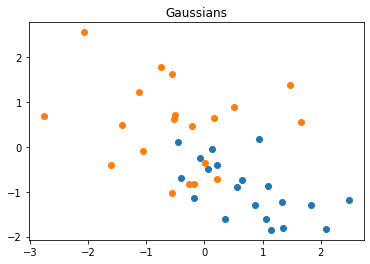

In [2]:
 sample_Total, training_input_gaussian, test_input_gaussian, class_labels = gaussian(
    training_size=20,
    test_size=10,
    n=2,
    plot_data=True
     
)
datapoints_gaussian, class_to_label_gaussian = split_dataset_to_data_and_labels(test_input_gaussian)

In [5]:
seed = 1024

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map,training_input_gaussian, test_input_gaussian, datapoints_gaussian[0])


backend = BasicAer.get_backend('qasm_simulator')
quantum_instance_gaussian = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)


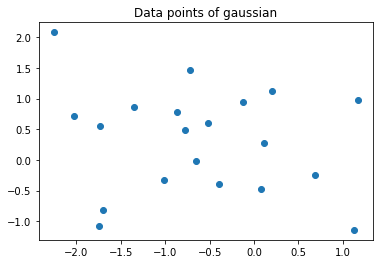

In [38]:
x=[]
y=[]
for i in datapoints_gaussian[0]:
        x.append(i[0])
        y.append(i[1])

plt.title("Data points of gaussian")
plt.scatter(x,y)

In [7]:
result_gaussian = qsvm.run(quantum_instance_gaussian)

In [8]:
print('Predicted labels: ',result_gaussian['predicted_labels'])
print('actual labels   : ',datapoints_gaussian[1])
print('Success Ratio',result_gaussian['test_success_ratio'])

Predicted labels:  [0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0]
actual labels   :  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Success Ratio 0.6


In [45]:
print(result_gaussian['predicted_labels']==datapoints_gaussian[1])

[ True  True  True  True  True False  True  True False  True False  True
 False  True False  True False  True False False]


>Now we can verify predicted results from actual results and also verify that we have 60% accuracy.


Let's increase the size of training dataset (double) and then observe the results

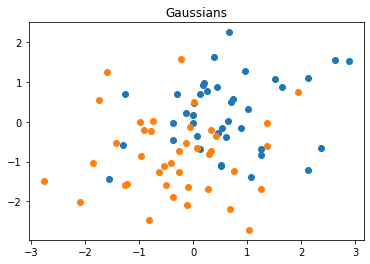

In [14]:
 sample_Total, training_input_gaussian_double, test_input_gaussian_double, class_labels = gaussian(
    training_size=40,
    test_size=10,
    n=2,
    plot_data=True
     
)
datapoints_gaussian_double, class_to_label_gaussian_double = split_dataset_to_data_and_labels(test_input_gaussian_double)

In [39]:
x=[]
y=[]
for i in datapoints_gaussian_double[0]:
        x.append(i[0])
        y.append(i[1])


plt.title("Data points of gaussian with double training dataset")
plt.scatter(x,y)

In [16]:
seed = 1024

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map,training_input_gaussian_double, test_input_gaussian_double, datapoints_gaussian_double[0])


backend = BasicAer.get_backend('qasm_simulator')
quantum_instance_gaussian_double = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)



In [17]:
 result_gaussian_double = qsvm.run(quantum_instance_gaussian_double)

In [18]:
print('Predicted labels: ',result_gaussian_double['predicted_labels'])
print('actual labels   : ',datapoints_gaussian_double[1])
print('Success Ratio',result_gaussian_double['test_success_ratio'])

Predicted labels:  [1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0]
actual labels   :  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Success Ratio 0.55


We can observe from the above mentioned results that the success ratio has decreased.

Training size and type of data points matters when we are working with the QSVM.

***
### 3. Working with breast cancer dataset

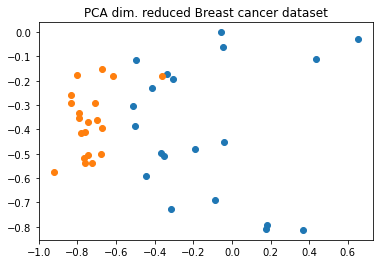

In [294]:
 sample_Total, training_input_breast_cancer, test_input_breast_cancer, class_labels = breast_cancer(
    training_size=20,
    test_size=10,
    n=2,
    plot_data=True
     
)
datapoints_breast_cancer, class_to_label_breast_cancer = split_dataset_to_data_and_labels(test_input_breast_cancer)

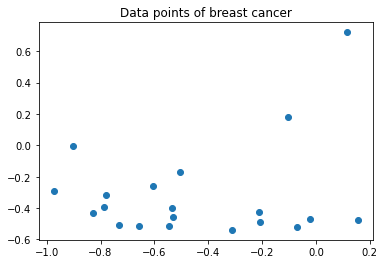

In [40]:
x=[]
y=[]
for i in datapoints_breast_cancer[0]:
        x.append(i[0])
        y.append(i[1])

plt.title("Data points of breast cancer")
plt.scatter(x,y)

In [296]:
seed = 1024

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map,training_input_breast_cancer, test_input_breast_cancer, datapoints_breast_cancer[0])


backend = BasicAer.get_backend('qasm_simulator')
quantum_instance_breast_cancer = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)



In [297]:
result_breast_cancer = qsvm.run(quantum_instance_breast_cancer)

In [298]:
print('Predicted labels: ',result_breast_cancer['predicted_labels'])
print('actual labels   : ',datapoints_breast_cancer[1])
print('Success Ratio',result_breast_cancer['test_success_ratio'])

Predicted labels:  [0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0]
actual labels   :  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Success Ratio 0.8


We got 80% success percentage with the breast cancer dataset

>Let's Increase the training data size for this dataset also

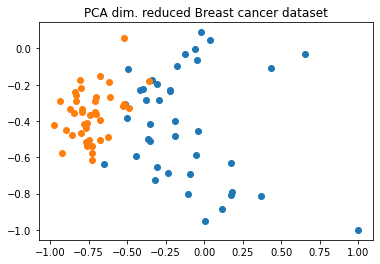

In [32]:
 sample_Total, training_input_breast_cancer_double, test_input_breast_cancer_double, class_labels = breast_cancer(
    training_size=40,
    test_size=10,
    n=2,
    plot_data=True
     
)
datapoints_breast_cancer_double, class_to_label_breast_cancer_double = split_dataset_to_data_and_labels(test_input_breast_cancer_double)

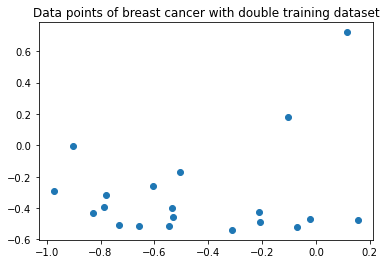

In [41]:
x=[]
y=[]
for i in datapoints_breast_cancer_double[0]:
        x.append(i[0])
        y.append(i[1])

plt.title("Data points of breast cancer with double training dataset")
plt.scatter(x,y)

In [34]:
seed = 1024

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map,training_input_breast_cancer_double, test_input_breast_cancer_double, datapoints_breast_cancer_double[0])


backend = BasicAer.get_backend('qasm_simulator')
quantum_instance_breast_cancer_double = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)



In [35]:
result_breast_cancer_double = qsvm.run(quantum_instance_breast_cancer_double)

In [36]:
print('Predicted labels: ',result_breast_cancer_double['predicted_labels'])
print('actual labels   : ',datapoints_breast_cancer_double[1])
print('Success Ratio',result_breast_cancer_double['test_success_ratio'])

Predicted labels:  [0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1]
actual labels   :  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Success Ratio 0.85


For this dataset, our success ratio increased by 0.05 i.t 5% on doubling the training dataset size

### Dataset
I worked on the following datasets:<br>
- ad_hoc dataset
- samples_ad_hoc dataset
- gaussian dataset
- breast cancer dataset

>Working on other was difficult as there were more than 2 classes involved in the datasets, have added the visualization of the datapoints. It was throwing this error _A multiclass extension must be provided_

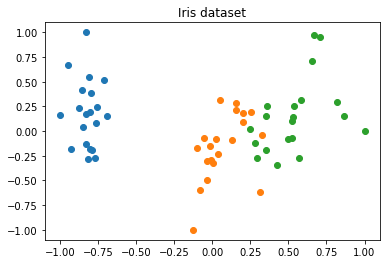

In [301]:
sample_Total, training_input, test_input, class_labels = iris(
    training_size=20,
    test_size=10,
    n=2,
    plot_data=True
)
sample_Total, training_input, test_input, class_labels = wine(
    training_size=20,
    test_size=10,
    n=2,
    plot_data=True
)


# References
- https://quantumcomputinguk.org/tutorials/how-to-implement-qsvm-algorithm-on-ibms-quantum-computers-with-qiskit
- https://thequantuminsider.com/2020/04/10/quantum-programming-101-qsvm-machine-learning-tutorial/
- https://medium.com/swlh/quantum-machine-learning-the-next-big-thing-95bfc3b4f08f
- https://qiskit.org/documentation/stable/0.24/apidoc/qiskit.ml.datasets.html
- https://qiskit.org/documentation/stable/0.25/tutorials/machine_learning/01_qsvm_classification.html
- https://qiskit.org/documentation/stable/0.26/stubs/qiskit.aqua.algorithms.QSVM.html
- https://qiskit.org/documentation/stable/0.26/stubs/qiskit.aqua.algorithms.QSVM.html#qiskit.aqua.algorithms.QSVM.predict
- https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray